In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('/content/2022-04-25-Train-01-Feb-22.csv', date_parser = True)
data.tail()

,Date,open_price,high_price,low_price,close_price,estimated_transaction_volume
4774,1/28/2022,37179.62,38022.11,36173.98,37748.36,83927.67605
4775,1/29/2022,37713.14,38741.67,37327.79,38192.65,133484.65470
4776,1/30/2022,38176.45,38378.88,37372.59,37941.82,123921.03280
4777,1/31/2022,37914.10,38776.33,36631.66,38491.92,42789.79031
4778,2/1/2022,38483.56,39285.00,38033.78,38733.04,77656.59820


In [ ]:
#data_training = data[data['date']< '2022-31-01'].copy()
data_training = pd.read_csv('/content/2022-04-25-Train-01-Feb-22.csv')
len(data_training)

4779

In [ ]:
#data_test = data[data['date']< '2022-31-01'].copy()
data_test = pd.read_excel('/content/Test-2-7-Feb.xlsx')
data_test

,Date,open_price,high_price,low_price,close_price,estimated_transaction_volume
0,2022-02-02,38768.08,38883.96,36618.36,36923.50,103407.24370
1,2022-02-03,36924.50,37391.74,36264.55,37320.11,103723.06740
2,2022-02-04,37330.75,41760.39,37064.28,41579.57,72998.74525
3,2022-02-05,41608.82,41983.12,40975.00,41427.72,210121.41520
4,2022-02-06,41422.70,42701.86,41141.81,42420.24,130352.53840
5,2022-02-07,42420.24,44524.18,41682.11,43869.04,170445.63010
6,2022-02-08,43895.60,45501.00,42701.19,44091.56,126825.18780


In [ ]:
data_test = data_test.drop(['Date'], axis = 1)
data_test.head()

,open_price,high_price,low_price,close_price,estimated_transaction_volume
0,38768.08,38883.96,36618.36,36923.50,103407.24370
1,36924.50,37391.74,36264.55,37320.11,103723.06740
2,37330.75,41760.39,37064.28,41579.57,72998.74525
3,41608.82,41983.12,40975.00,41427.72,210121.41520
4,41422.70,42701.86,41141.81,42420.24,130352.53840


In [ ]:
training_data = data_training.drop(['Date'], axis = 1)
training_data.head()

,open_price,high_price,low_price,close_price,estimated_transaction_volume
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [ ]:
# X_train = training_data[['estimated_transaction_volume', 'open_price','high_price', 'low_price']]
# Y_train = training_data['close_price']

In [ ]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data
# X_train = scaler.fit_transform(X_train )
# Y_train = scaler.fit_transform(Y_train )
# X_train

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       ...,
       [0.5651794 , 0.55621565, 0.56411457, 0.56161015, 0.02332341],
       [0.56129547, 0.5619758 , 0.55293072, 0.56975266, 0.00805355],
       [0.56972598, 0.56934783, 0.57409479, 0.57332169, 0.01461589]])

In [ ]:
scaler = MinMaxScaler()
data_test = scaler.fit_transform(data_test)
data_test

array([[0.26446042, 0.18401432, 0.05496812, 0.        , 0.22176128],
       [0.        , 0.        , 0.        , 0.05533017, 0.2240645 ],
       [0.05827631, 0.53872363, 0.1242465 , 0.6495579 , 0.        ],
       [0.67196282, 0.56618976, 0.73181815, 0.62837365, 1.        ],
       [0.64526402, 0.65482177, 0.75773385, 0.76683789, 0.41826631],
       [0.78836052, 0.87954265, 0.84167516, 0.96895673, 0.71065481],
       [1.        , 1.        , 1.        , 1.        , 0.39254226]])

In [ ]:
X_train = [] 
Y_train = []
training_data.shape[0]


4806

In [ ]:
X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
  X_train.append(training_data[i-60:i])
  Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
Y_train.shape

(4719,)

 **MRCLSTM neural network**

*   The network contains an input layer
*   a 1D convolutional layer
*   the multi-scale residual module
*   an LSTM layer
*   a fully connected layer
*   an output layer



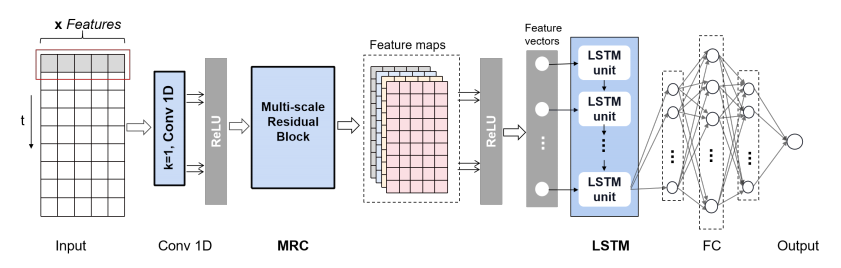

In [ ]:
#1D kernal 
from keras.layers import Input, Dense, LSTM, MaxPooling1D, Conv1D, Concatenate
from keras.models import Model
import tensorflow as tf
#input
input_layer = Input(shape=(X_train.shape[1], 5))
#Conv 1D Layer
conv1 = Conv1D(filters=16,
               kernel_size=1,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
#MRC
l1 = Conv1D(filters=16,
               kernel_size=1,
               strides=1,
               activation='relu',
               padding='same')(conv1)
l2 = Conv1D(filters=16,
               kernel_size=2,
               strides=1,
               activation='relu',
               padding='same')(conv1)
l3 = Conv1D(filters=16,
               kernel_size=3,
               strides=1,
               activation='relu',
               padding='same')(conv1)
Multi_scale_Residual_Block = Concatenate()([l1, l2, l3]) #tf.keras.layers.
#LSTM layer
lstm1 = LSTM(50, return_sequences=True)(Multi_scale_Residual_Block)
#Fully Connected Layer
#output layer
output_layer = Dense(1, activation='sigmoid')(lstm1)
model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 60, 5)]      0           []                               
                                                                                                  
 conv1d_4 (Conv1D)              (None, 60, 16)       96          ['input_2[0][0]']                
                                                                                                  
 conv1d_5 (Conv1D)              (None, 60, 16)       272         ['conv1d_4[0][0]']               
                                                                                                  
 conv1d_6 (Conv1D)              (None, 60, 16)       528         ['conv1d_4[0][0]']               
                                                                                            

In [ ]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
X_train.shape

(4746, 60, 5)

In [ ]:
Y_train.shape

(4746,)

In [ ]:
history= model.fit(X_train, Y_train, epochs = 500, batch_size =50, validation_split=0.1)

Epoch 1/500
85/85 [==============================] - 1s 10ms/step - loss: 0.0031 - val_loss: 0.3989
Epoch 2/500
85/85 [==============================] - 1s 7ms/step - loss: 0.0030 - val_loss: 0.3983
Epoch 3/500
85/85 [==============================] - 1s 7ms/step - loss: 0.0030 - val_loss: 0.3966
Epoch 4/500
85/85 [==============================] - 1s 8ms/step - loss: 0.0030 - val_loss: 0.4008
Epoch 5/500
85/85 [==============================] - 1s 7ms/step - loss: 0.0030 - val_loss: 0.3975
Epoch 6/500
85/85 [==============================] - 1s 7ms/step - loss: 0.0030 - val_loss: 0.3955
Epoch 7/500
85/85 [==============================] - 1s 8ms/step - loss: 0.0030 - val_loss: 0.3963
Epoch 8/500
85/85 [==============================] - 1s 8ms/step - loss: 0.0030 - val_loss: 0.3986
Epoch 9/500
85/85 [==============================] - 1s 8ms/step - loss: 0.0030 - val_loss: 0.3975
Epoch 10/500
85/85 [==============================] - 1s 7ms/step - loss: 0.0030 - val_loss: 0.3955
Epoch 11

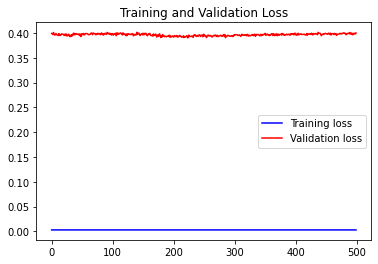

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()